In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('E:\Deep - Data Science\Online Lectures\Machine Learning\In-class Exercise\AirPassengers1.csv')

In [4]:
ts_output = data['#Passengers']


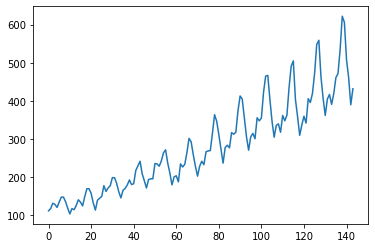

In [5]:
plt.plot(ts_output)

In [14]:
def test_stationary(timeseries):
    #find the rolling statistics
    rolmean = timeseries.rolling(window=10).mean()
    rolstd = timeseries.rolling(window=10).std()
    
    #plot the rolling statistics
    orig = plt.plot(timeseries,color='blue',label = 'original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
    plt.legend()
    plt.show()
    
    #perform dickey fuller method
    from statsmodels.tsa.stattools import adfuller
    print('The result of Dickey Fuller Test')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)

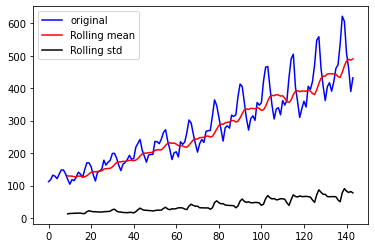

The result of Dickey Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [15]:
test_stationary(ts_output)

#### Null Hypothesis = TS Dataset in not stationary

###### p value > 0.05 #mean Null hypothesis is accepted

**So data is non stationary**

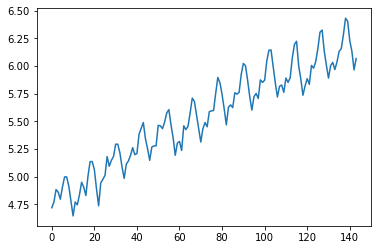

In [16]:
#Try to stationarise data
ts_log = np.log(ts_output)
plt.plot(ts_log)

Text(0.5, 1.0, 'log plot')

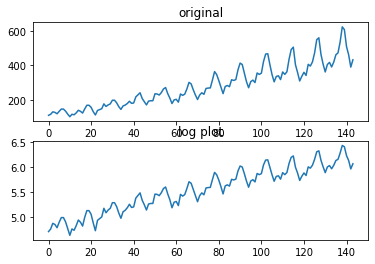

In [17]:
plt.subplot(2,1,1)
plt.plot(ts_output)
plt.title("original")
plt.subplot(2,1,2)
plt.plot(ts_log)
plt.title("log plot")

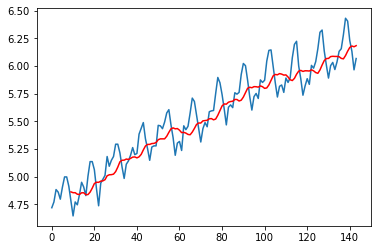

In [19]:
#Find the moving average
movingAvg = ts_log.rolling(window=10).mean()

plt.plot(ts_log)
plt.plot(movingAvg, color = "red" )
plt.show()

In [23]:
# Get the difference between moving average value and the actual number of passengers
ts_log_mv_diff = ts_log - movingAvg
#Remove the resulting null values, if any
ts_log_mv_diff.dropna(inplace = True)
ts_log_mv_diff.head(10)

9    -0.082783
10   -0.210105
11   -0.083811
12   -0.095777
13   -0.002074
14    0.095107
15    0.051622
16   -0.008449
17    0.166510
18    0.276048
Name: #Passengers, dtype: float64

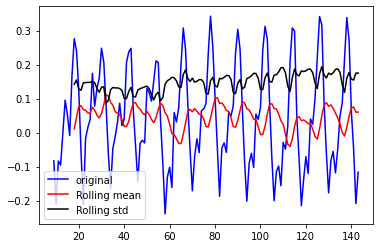

The result of Dickey Fuller Test
Test Statistic                  -3.183441
p-value                          0.020963
#Lags Used                      13.000000
Number of Observations Used    121.000000
dtype: float64


In [24]:
test_stationary(ts_log_mv_diff)

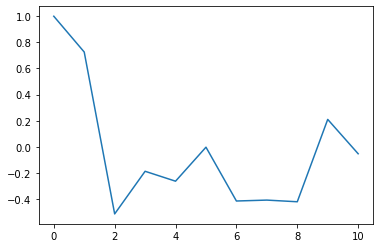

In [26]:
plt.plot(np.arange(0,11) , pacf(ts_log_mv_diff , nlags = 10))

##### Null Hypothesis = TS Dataset in not stationary
##### p value < 0.05 #mean Null hypothesis is accepted
**So data is stationary**

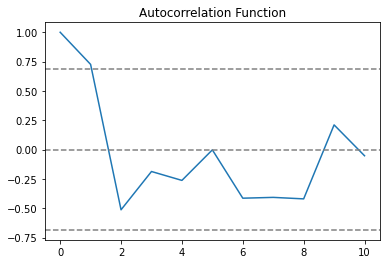

In [27]:
#plot PACF
from statsmodels.tsa.stattools import acf,pacf
plt.plot(np.arange(0,11) , pacf(ts_log_mv_diff , nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

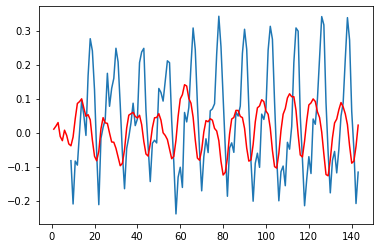

In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2,1,3)) #p=1,d=1,q=1
result_ARIMA = model.fit()
plt.plot(ts_log_mv_diff)
plt.plot(result_ARIMA.fittedvalues, color = 'red')

In [31]:
!pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\ADMIN\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

